# Lab 2: Exploratory Data Analysis: Time Series

## Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

## Exploratory analysis


In [19]:
df_Ash = pd.read_csv('/content/drive/My Drive/CEE322/Lab2/Ashton14.csv', header=0)
df_Deer = pd.read_csv('/content/drive/My Drive/CEE322/Lab2/Deerlodge14.csv', header=0)

In [20]:
df_Ash
df_Ash['datetime'] = pd.to_datetime(df_Ash['DATE'] + ' ' + df_Ash['TIME'])
df_Ash.index = df_Ash['datetime']
df_Ash = df_Ash.asfreq(freq='1H', method='bfill')
df_Ash.drop(columns='Unnamed: 0', inplace=True)
# OBM = Air Temperature, 15 Minute Average (degrees F) 
# TU = Relative Humidity, 15 Minute Average (percent) 
# WD = Wind Direction, Mean of Wind Vector (degrees azimuth) 
# WG = Peak Wind Gust last 15 minutes (mph) 
# WS = Wind Speed, Hourly Average (mph) 
# SI = 15 minute Solar Radiation,(langleys/hour) 

In [21]:
df_Deer
df_Deer['datetime'] = pd.to_datetime(df_Deer['DATE'] + ' ' + df_Deer['TIME'])
df_Deer.index = df_Deer['datetime']
df_Deer = df_Deer.asfreq(freq='1H', method='bfill')
df_Deer.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df_Deer

,DATE,TIME,OBM,TU,WD,WG,WS,SI,datetime
datetime,,,,,,,,,
2014-01-01 00:00:00,01/01/2014,00:00,30.02,83.70,58.81,5.92,1.93,0.0,2014-01-01 00:00:00
2014-01-01 01:00:00,01/01/2014,01:00,29.25,81.80,254.60,6.36,2.67,0.0,2014-01-01 01:00:00
2014-01-01 02:00:00,01/01/2014,02:00,27.53,80.80,41.77,6.79,4.20,0.0,2014-01-01 02:00:00
2014-01-01 03:00:00,01/01/2014,03:00,30.25,67.56,2.07,14.03,9.25,0.0,2014-01-01 03:00:00
2014-01-01 04:00:00,01/01/2014,04:00,30.62,68.57,20.30,12.71,9.05,0.0,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,12/31/2014,19:00,-4.14,72.52,285.00,3.07,2.29,0.0,2014-12-31 19:00:00
2014-12-31 20:00:00,12/31/2014,20:00,-5.26,72.23,266.00,5.26,4.14,0.0,2014-12-31 20:00:00
2014-12-31 21:00:00,12/31/2014,21:00,-5.16,72.71,335.40,3.07,1.02,0.0,2014-12-31 21:00:00


In [ ]:
na_num = df_Ash[df_Ash.isnull().any(axis = 1)].shape[0]
na_percent = na_num / df_Ash.shape[0]
print('There are ' + str(na_num) + ' rows having na (' + str(round(na_percent, 2)) + ' of sample size) in df_Ash')
na_num = df_Deer[df_Deer.isnull().any(axis = 1)].shape[0]
na_percent = na_num / df_Deer.shape[0]
print('There are ' + str(na_num) + ' rows having na (' + str(round(na_percent, 2)) + ' of sample size) in df_Deer')

There are 0 rows having na (0.0 of sample size) in df_Ash
There are 0 rows having na (0.0 of sample size) in df_Deer


## Analysis

### Single variable

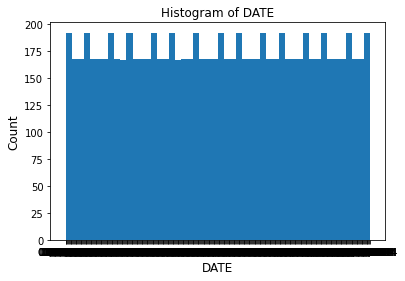

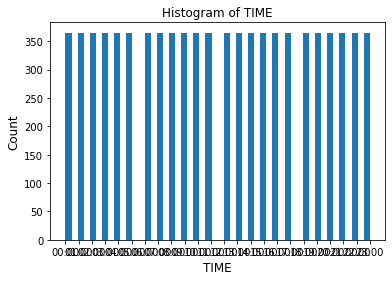

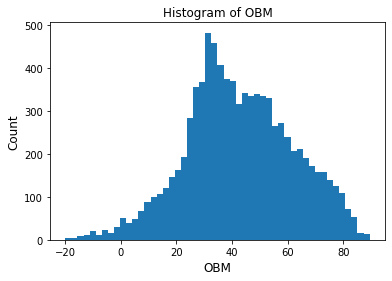

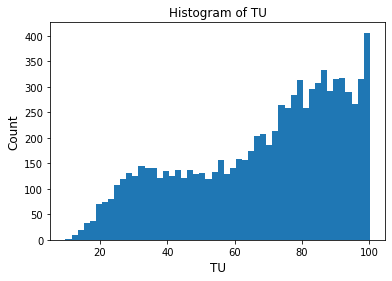

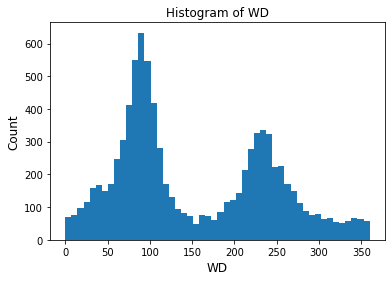

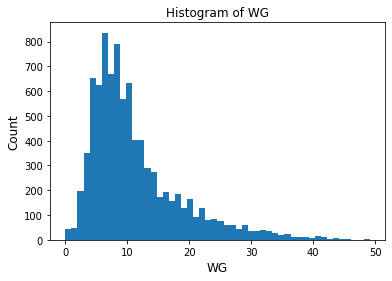

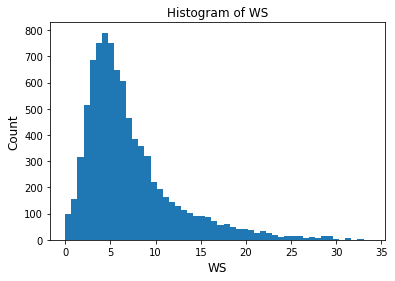

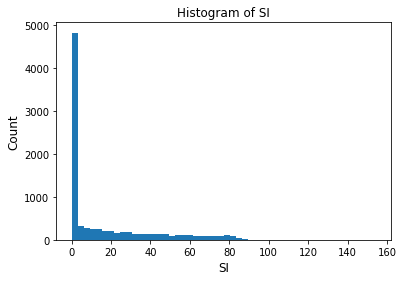

In [ ]:
for i in df_Ash.columns.values:
  plt.figure()
  plt.hist(df_Ash[str(i)], bins=50)
  # plt.xlim([0, 50])
  # plt.ylim([0, 25])
  plt.xlabel(str(i), fontsize=12)
  plt.ylabel('Count', fontsize=12)
  # plt.xticks([0, 10, 20, 30, 40, 50], fontsize=12)
  # plt.yticks([0, 5, 10, 15, 20, 25], fontsize=12)
  # plt.legend(loc='upper right', fontsize=12)
  plt.title('Histogram of ' + str(i), fontsize=12)
  plt.show()

Temperature has a normal distribution. Humidity left skewed. wind direction has two cluster distributions. Wind gust and speed has a very similar distribution. But wind gust magnitube is larger. Majority of solar radiation is very low. But still there are a few high radiation.

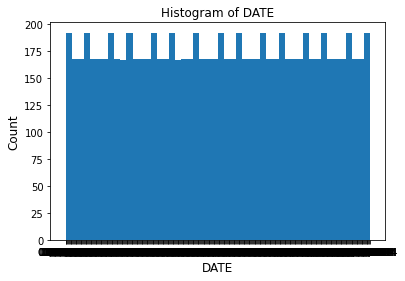

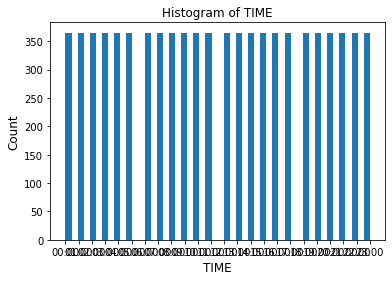

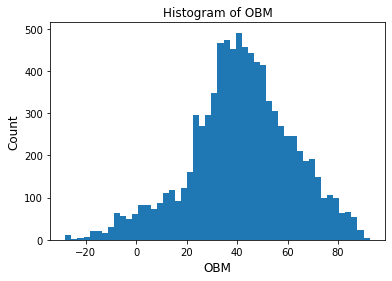

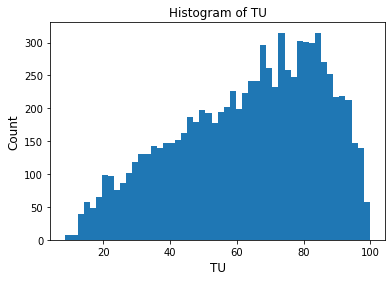

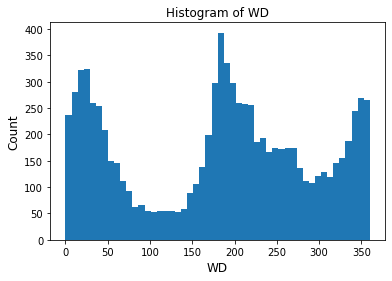

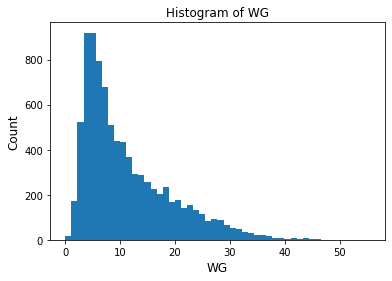

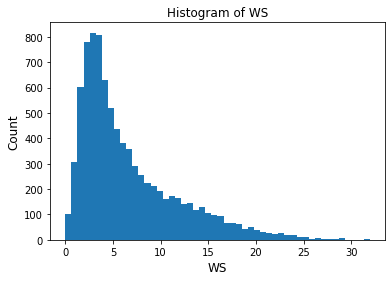

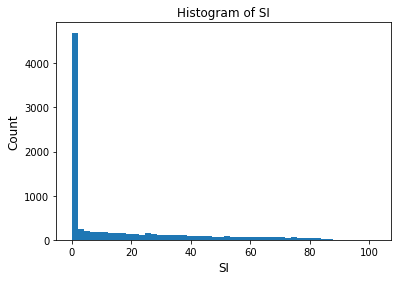

In [ ]:
for i in df_Deer.columns.values:
  plt.figure()
  plt.hist(df_Deer[str(i)], bins=50)
  # plt.xlim([0, 50])
  # plt.ylim([0, 25])
  plt.xlabel(str(i), fontsize=12)
  plt.ylabel('Count', fontsize=12)
  # plt.xticks([0, 10, 20, 30, 40, 50], fontsize=12)
  # plt.yticks([0, 5, 10, 15, 20, 25], fontsize=12)
  # plt.legend(loc='upper right', fontsize=12)
  plt.title('Histogram of ' + str(i), fontsize=12)
  plt.show()

Temperature has a normal distribution. Humidity left skewed. wind direction has two trends oppisite to the ash site. Wind gust and speed has a very similar distribution. But wind gust magnitube is larger. Majority of solar radiation is very low. But still there are a few high radiation.

**Major difference for two sites are wind direction**

### Multiple variables

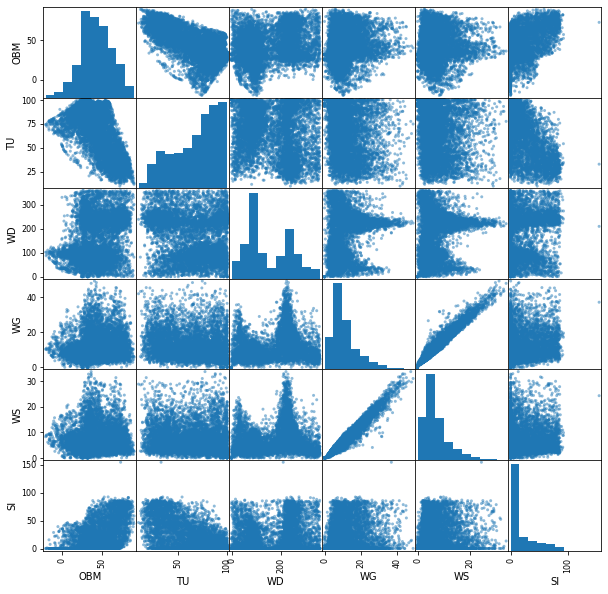

In [ ]:
# OBM = Air Temperature, 15 Minute Average (degrees F) 
# TU = Relative Humidity, 15 Minute Average (percent) 
# WD = Wind Direction, Mean of Wind Vector (degrees azimuth) 
# WG = Peak Wind Gust last 15 minutes (mph) 
# WS = Wind Speed, Hourly Average (mph) 
# SI = 15 minute Solar Radiation,(langleys/hour) 
pd.plotting.scatter_matrix(df_Ash.loc[:, ['OBM', 'TU', 'WD', 'WG', 'WS', 'SI']], figsize=(10, 10))
plt.show()



*   Negative: OBM - TU, OBM - WD, OBM - WG, OBM - WS, **TU - SI** 
*   Positive: OBM - SI, **WG-WS**



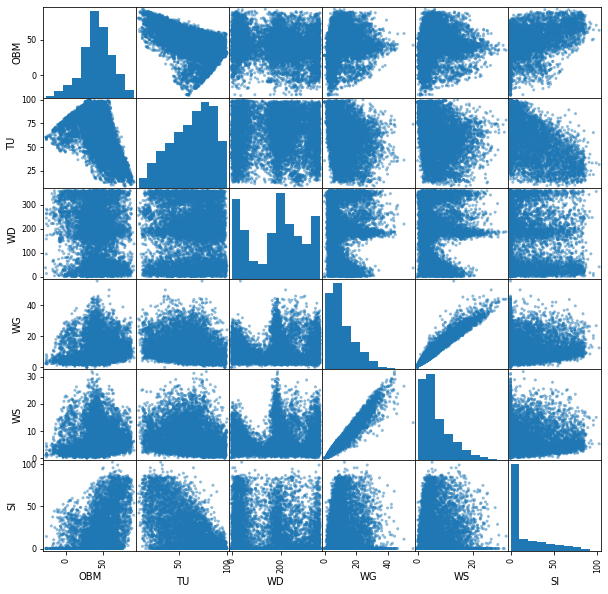

In [ ]:
pd.plotting.scatter_matrix(df_Deer.loc[:, ['OBM', 'TU', 'WD', 'WG', 'WS', 'SI']], figsize=(10, 10))
plt.show()

*   Negative: **OBM - TU**, OBM - WD, OBM - WG, OBM - WS, **TU - SI** 
*   Positive: **OBM - SI**, **WG-WS**

### Sequence plot (time)

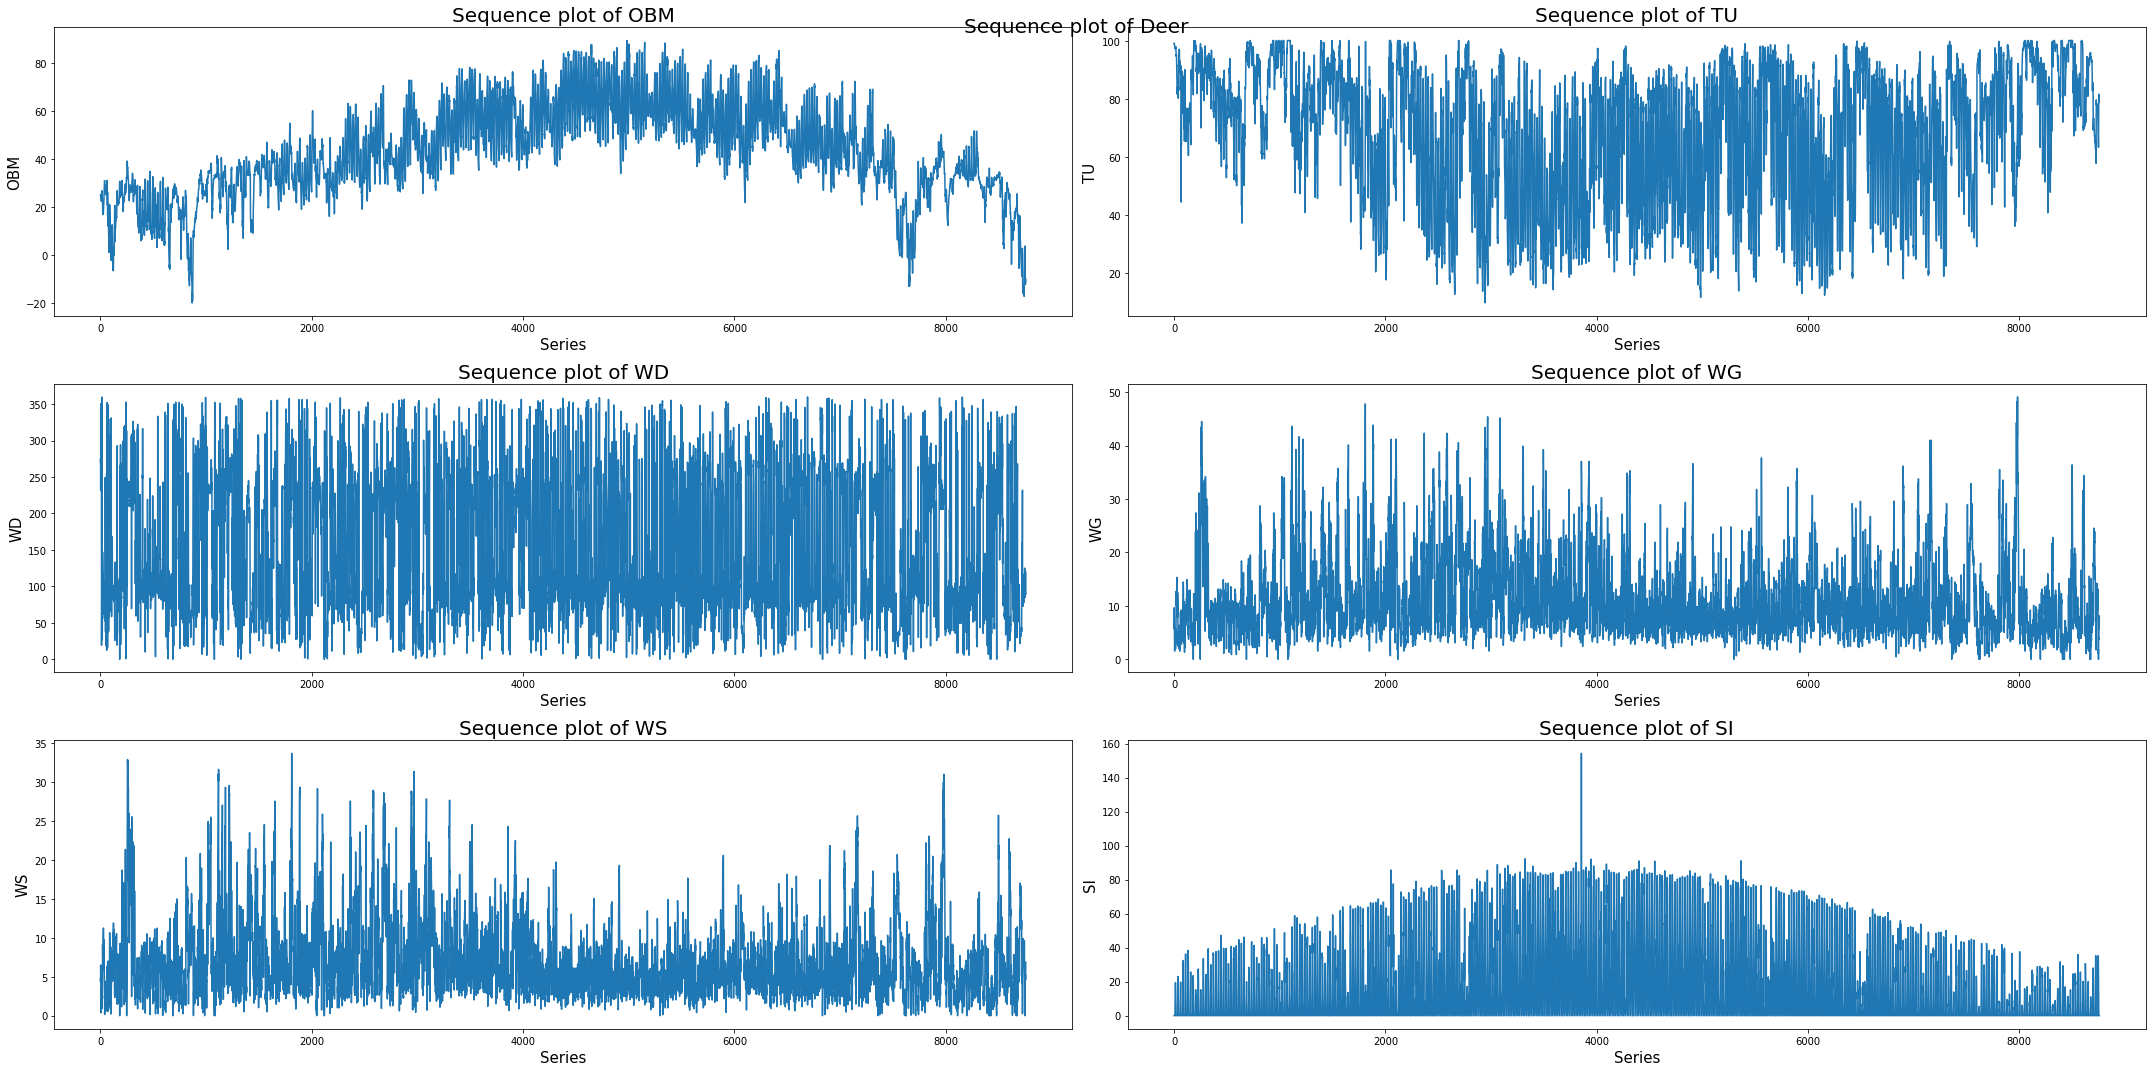

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(30, 15)) # (1, 2) inputs say we want 1 row and 2 columns of plots
col_values = df_Ash.columns.values.tolist()
j = 2
for i in range(6):
    x = i // 2
    i = i % 2
    ax[x, i].plot(df_Ash[str(col_values[j])])
    ax[x, i].set_ylabel(str(col_values[j]), fontsize=15)
    ax[x, i].set_xlabel('Series', fontsize=15)
    ax[x, i].set_title('Sequence plot of ' + str(col_values[j]), size = 20)
    j += 1
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Sequence plot of Deer', fontsize = 20)
plt.tight_layout()
plt.show()

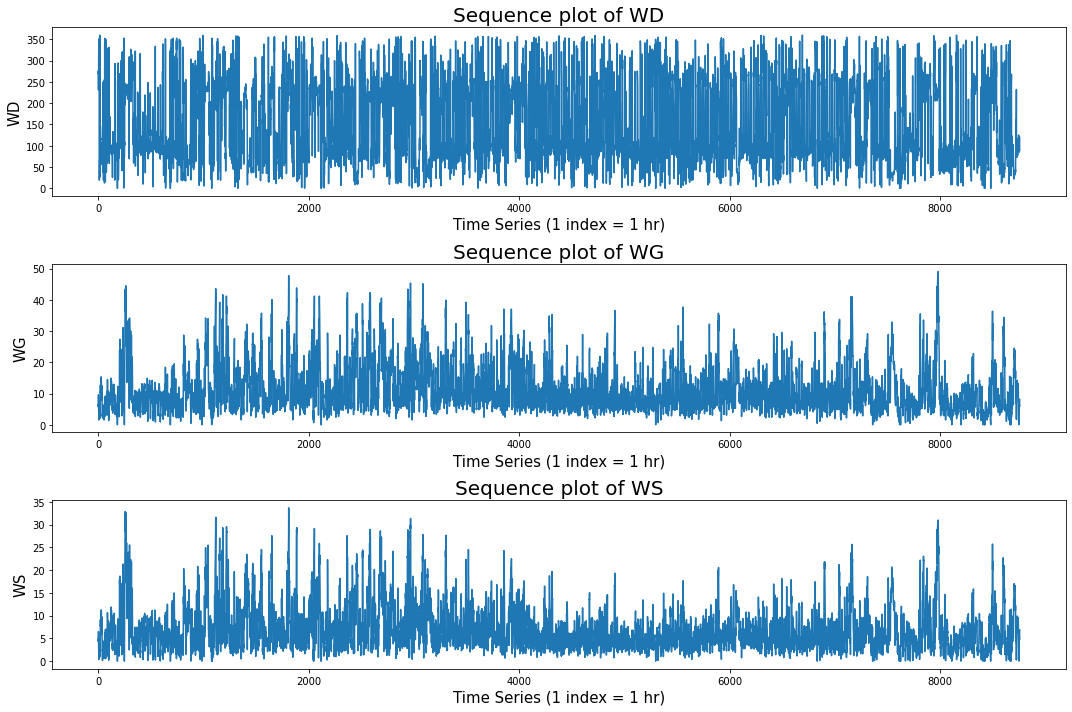

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10)) # (1, 2) inputs say we want 1 row and 2 columns of plots
col_values = df_Ash.columns.values.tolist()
for i in range(7):
    if (str(col_values[i]) == 'WD' or str(col_values[i]) == 'WS' or str(col_values[i]) == 'WG'):
      x = i - 4
      ax[x].plot(df_Ash[str(col_values[i])])
      ax[x].set_ylabel(str(col_values[i]), fontsize=15)
      ax[x].set_xlabel('Time Series (1 index = 1 hr)', fontsize=15)
      ax[x].set_title('Sequence plot of ' + str(col_values[i]), size = 20)
    
plt.subplots_adjust(hspace=0.5)
# plt.suptitle('Sequence plot of Ash', fontsize = 20)
plt.tight_layout()
plt.show()

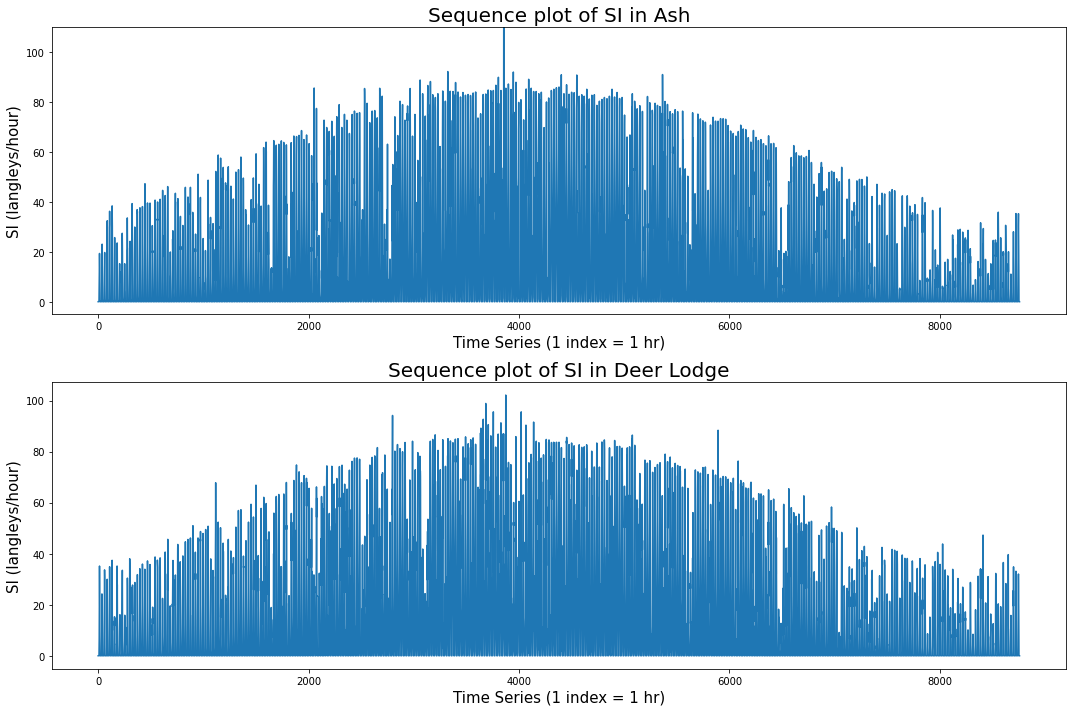

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10)) # (1, 2) inputs say we want 1 row and 2 columns of plots
col_values = df_Ash.columns.values.tolist()
for i in range(2):
    if (i == 0):
      ax[i].plot(df_Ash['SI'])
      ax[i].set_ylabel('SI (langleys/hour)', fontsize=15)
      ax[i].set_xlabel('Time Series (1 index = 1 hr)', fontsize=15)
      ax[i].set_ylim([-5, 110])
      ax[i].set_title('Sequence plot of SI in Ash', size = 20)
    else:
      ax[i].plot(df_Deer['SI'])
      ax[i].set_ylabel('SI (langleys/hour)', fontsize=15)
      ax[i].set_xlabel('Time Series (1 index = 1 hr)', fontsize=15)
      ax[i].set_title('Sequence plot of SI in Deer Lodge', size = 20)
    
plt.subplots_adjust(hspace=0.5)
# plt.suptitle('Sequence plot of Ash', fontsize = 20)
plt.tight_layout()
plt.show()

Pattern:
Summer: temperature higher, humidity lower (more fluctuation), fluctuated wind direction, lower wind speed, higher si
winter vise versa
Worth noticing wind speed is higher during Feb to May

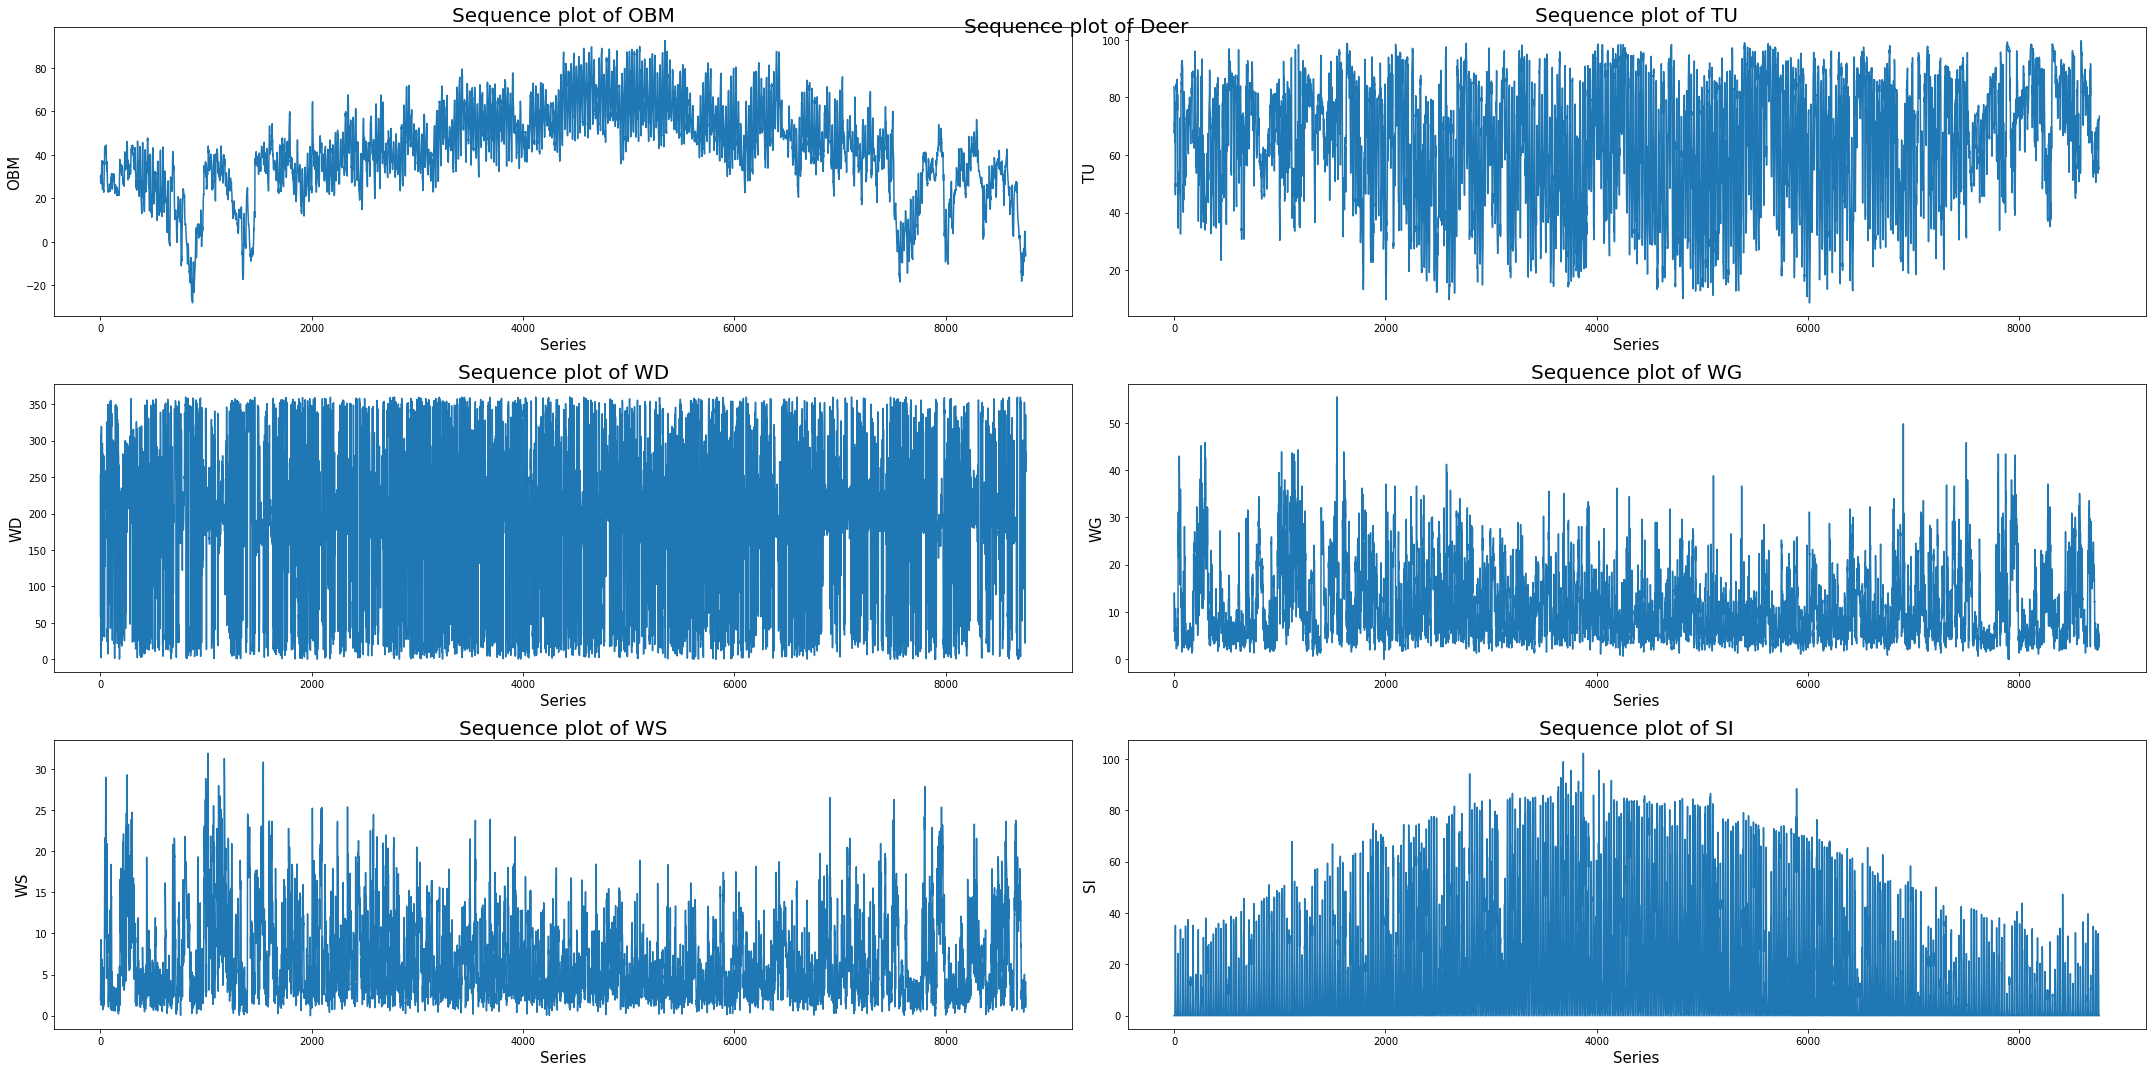

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(30, 15)) # (1, 2) inputs say we want 1 row and 2 columns of plots
col_values = df_Deer.columns.values.tolist()
j = 2
for i in range(6):
    x = i // 2
    i = i % 2
    ax[x, i].plot(df_Deer[str(col_values[j])])
    ax[x, i].set_ylabel(str(col_values[j]), fontsize=15)
    ax[x, i].set_xlabel('Series', fontsize=15)
    ax[x, i].set_title('Sequence plot of ' + str(col_values[j]), size = 20)
    j += 1
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Sequence plot of Deer', fontsize = 20)
plt.tight_layout()
plt.show()

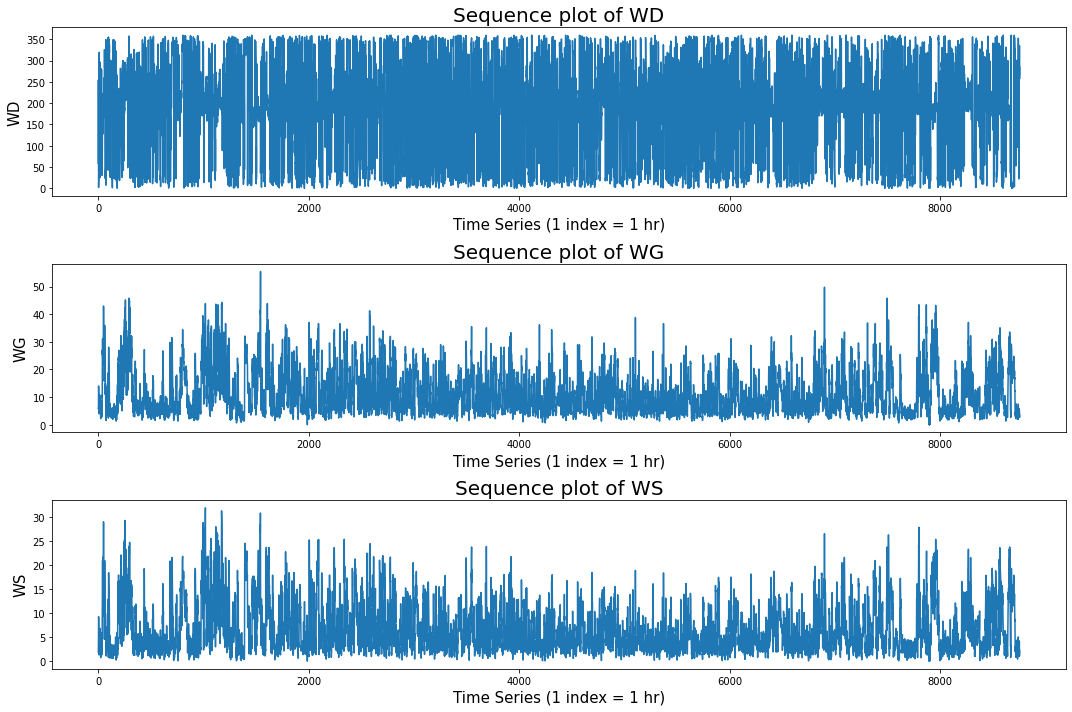

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10)) # (1, 2) inputs say we want 1 row and 2 columns of plots
col_values = df_Deer.columns.values.tolist()
for i in range(7):
    if (str(col_values[i]) == 'WD' or str(col_values[i]) == 'WS' or str(col_values[i]) == 'WG'):
      x = i - 4
      ax[x].plot(df_Deer[str(col_values[i])])
      ax[x].set_ylabel(str(col_values[i]), fontsize=15)
      ax[x].set_xlabel('Time Series (1 index = 1 hr)', fontsize=15)
      ax[x].set_title('Sequence plot of ' + str(col_values[i]), size = 20)
    
plt.subplots_adjust(hspace=0.5)
# plt.suptitle('Sequence plot of Ash', fontsize = 20)
plt.tight_layout()
plt.show()

Pattern:
Summer: temperature higher, humidity lower (more fluctuation), fluctuated wind direction, lower wind speed, higher si
winter vise versa
Worth noticing wind speed is higher during Feb to May

Deer seem to have more fluctuated wind direction



### Decomposition



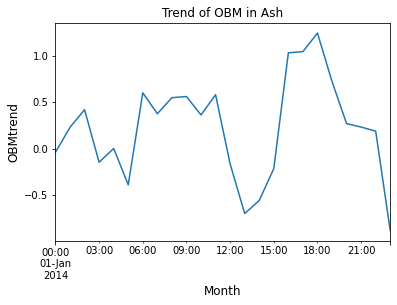

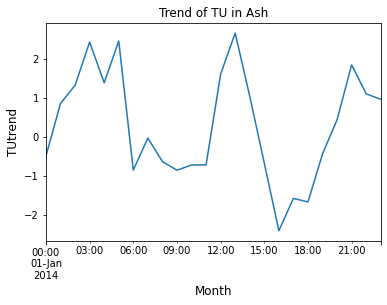

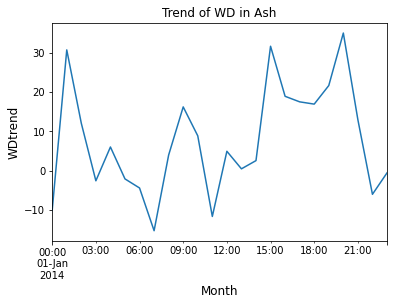

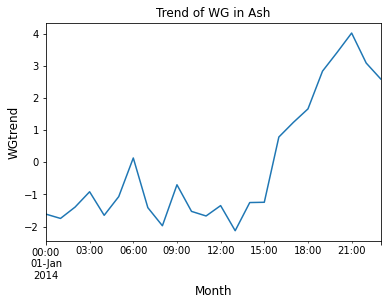

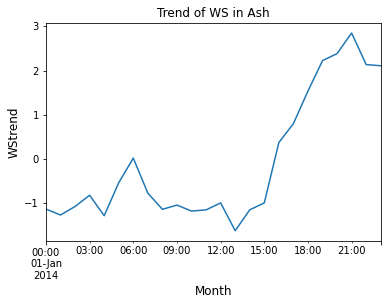

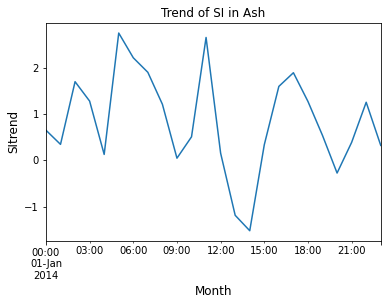

In [ ]:
for i in df_Ash.columns.values:
  if (str(i) == 'DATE' or str(i) == 'TIME' or str(i) =='datetime'):
    continue
  result = seasonal_decompose(df_Ash[str(i)],  model='additive', freq=365)
  result.seasonal[:24].plot()
  plt.xlabel("Month", fontsize=12)
  plt.ylabel(str(i) + 'trend', fontsize=12)
  plt.title('Trend of ' + str(i) + ' in Ash', fontsize=12)
  plt.show()

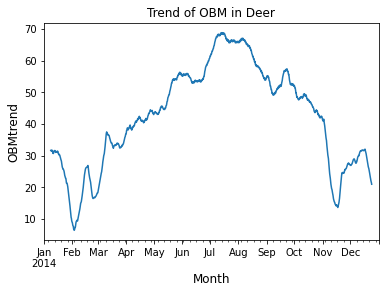

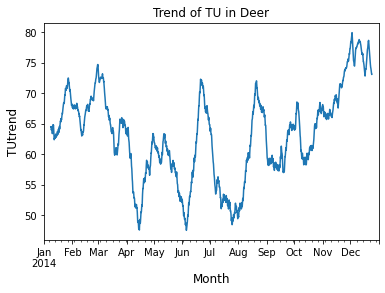

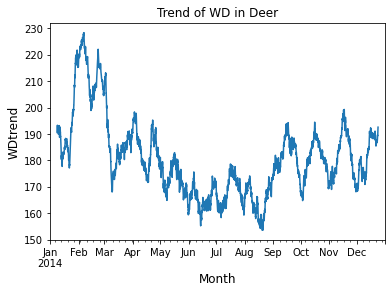

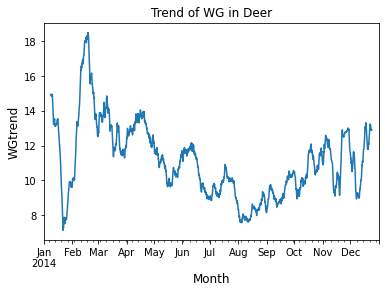

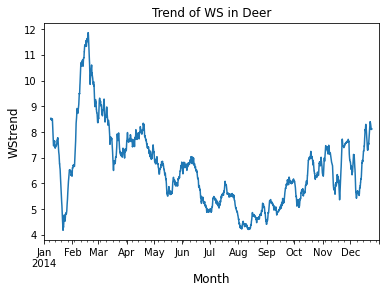

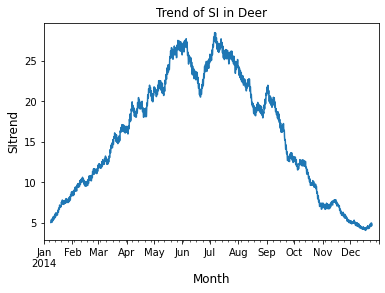

In [ ]:
for i in df_Deer.columns.values:
  if (str(i) == 'DATE' or str(i) == 'TIME' or str(i) =='datetime'):
    continue
  result = seasonal_decompose(df_Deer[str(i)],  model='additive', freq=365)
  result.trend.plot()
  plt.xlabel("Month", fontsize=12)
  plt.ylabel(str(i) + 'trend', fontsize=12)
  plt.title('Trend of ' + str(i) + ' in Deer', fontsize=12)
  plt.show()

### Comparison between two sites

In [ ]:
df_Ash.describe()

,OBM,TU,WD,WG,WS,SI
count,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000
mean,42.685299,68.325476,152.269885,11.253042,7.097929,15.827253
std,19.235792,23.108249,89.231140,7.423922,5.025392,23.605074
min,-19.890000,9.750000,0.000000,0.000000,0.000000,0.000000
25%,29.932500,50.162500,82.500000,6.140000,3.720000,0.010000
50%,41.500000,73.975000,114.500000,9.210000,5.730000,0.450000
75%,56.135000,87.500000,232.100000,14.030000,8.830000,26.280000
max,89.400000,100.100000,359.900000,49.100000,33.690000,154.300000


In [ ]:
df_Deer.describe()

,OBM,TU,WD,WG,WS,SI
count,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000,8758.000000
mean,41.668198,63.388008,181.133123,11.180048,6.642539,15.244370
std,20.430825,21.555411,109.861446,7.941274,5.171045,22.603332
min,-28.050000,8.620000,0.000000,0.000000,0.000000,0.000000
25%,30.180000,47.475000,64.977500,5.040000,2.860000,0.000000
50%,41.915000,66.690000,193.000000,8.550000,4.880000,0.490000
75%,54.840000,81.200000,266.000000,15.340000,9.127500,25.600000
max,92.500000,99.800000,360.000000,55.460000,31.920000,102.200000


* OBM: Ash is higher by about 1 F
* TU: Ash is higher by 5%
* WD: based on std, deer is more fluctuated, same as the obseration from the * sequence plot
* WG: Ash slightly higher
* WS: Ash higher by 0.5 mph
* SI: pretty close

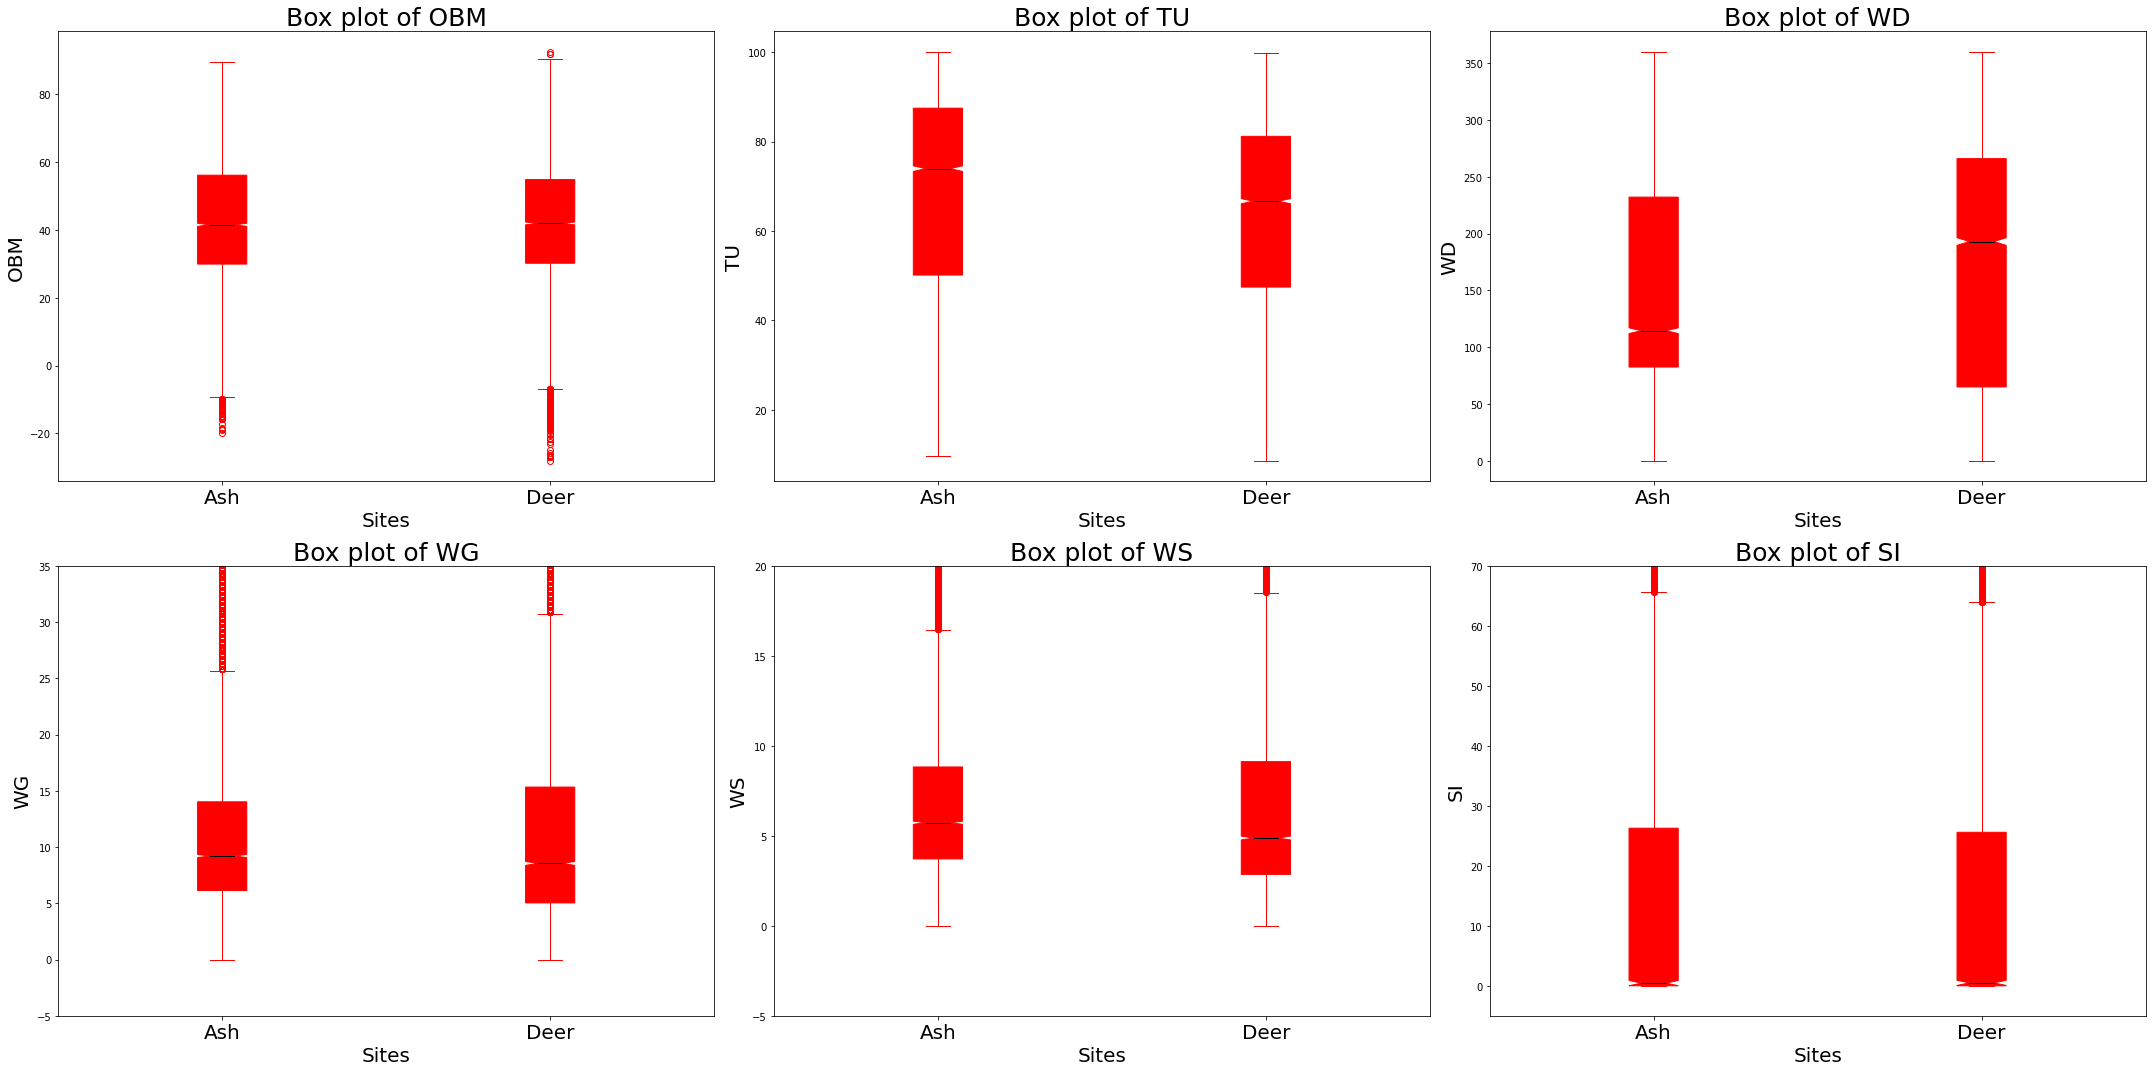

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15)) # (1, 2) inputs say we want 1 row and 2 columns of plots
col_values = df_Deer.columns.values.tolist()
data_list = [[df_Ash['OBM'].tolist(), df_Deer['OBM'].tolist()],[df_Ash['TU'].tolist(), df_Deer['TU'].tolist()], [df_Ash['WD'].tolist(), df_Deer['WD'].tolist()]
             , [df_Ash['WG'].tolist(), df_Deer['WG'].tolist()], [df_Ash['WS'].tolist(), df_Deer['WS'].tolist()], [df_Ash['SI'].tolist(), df_Deer['SI'].tolist()]]
j = 2
c = 'red'
for i in range(6):
    x = i // 3
    y = i
    i = i % 3
    ax[x, i].boxplot(data_list[y], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='black'),)
    ax[x, i].set_ylabel(str(col_values[j]), fontsize=20)
    ax[x, i].set_xlabel('Sites', fontsize=20)
    ax[x, i].set_xticklabels(['Ash', 'Deer'], fontsize=20)
    ax[x, i].set_title('Box plot of ' + str(col_values[j]), size = 25)
    j += 1
ax[1, 0].set_ylim([-5, 35])
ax[1, 1].set_ylim([-5, 20])
ax[1, 2].set_ylim([-5, 70])
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Same as described


### Autocorrelation

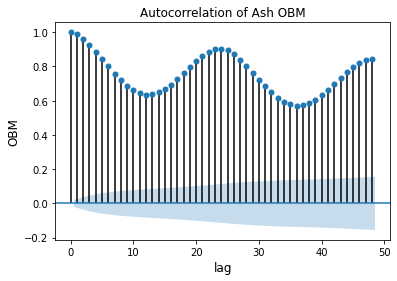

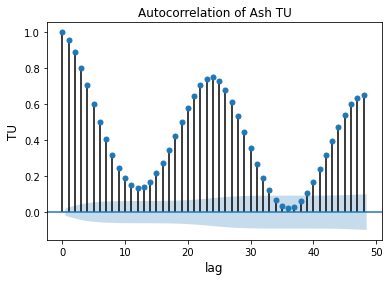

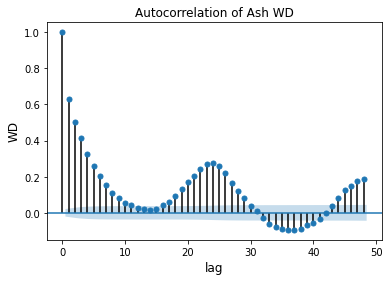

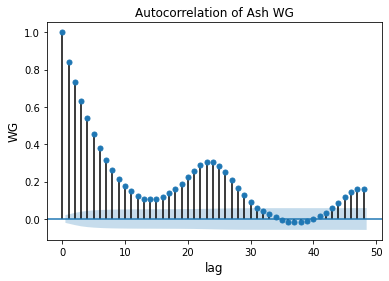

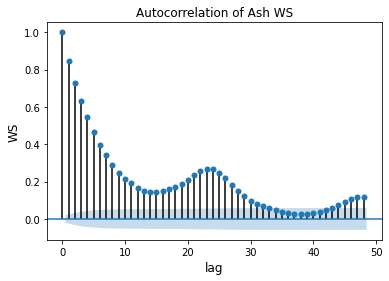

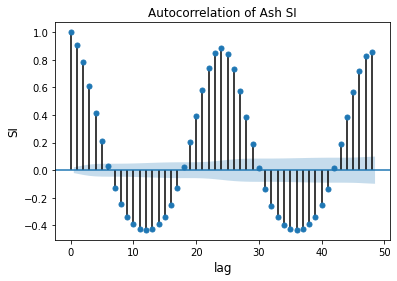

In [ ]:
for i in df_Ash.columns.values:
  if (str(i) == 'DATE' or str(i) == 'TIME'):
    continue
  plot_acf(df_Ash[str(i)], lags=48)
  plt.xlabel("lag", fontsize=12)
  plt.ylabel(str(i), fontsize=12)
  plt.title('Autocorrelation of Ash ' + str(i), fontsize=12)

Each column seems to have 24 hr period, WS WD WG all have low correlation

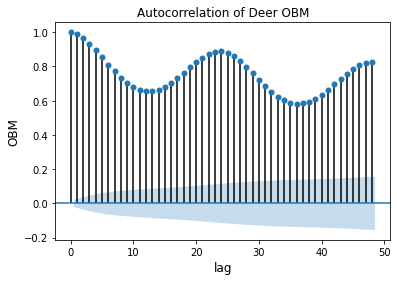

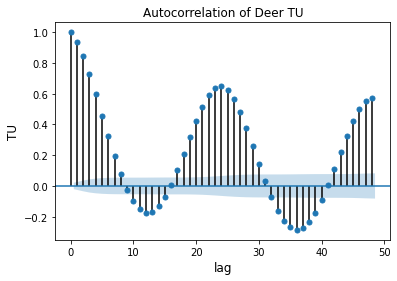

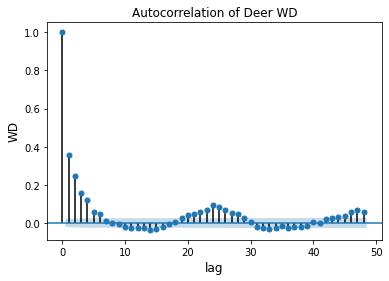

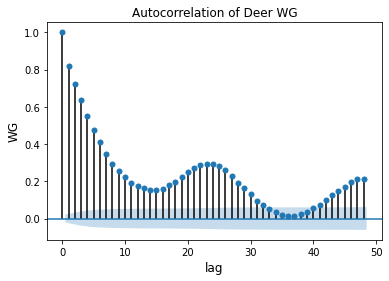

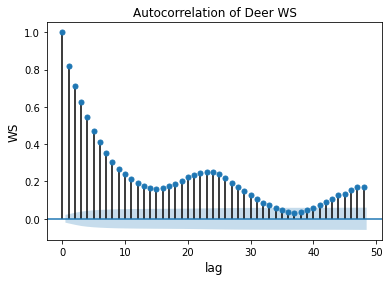

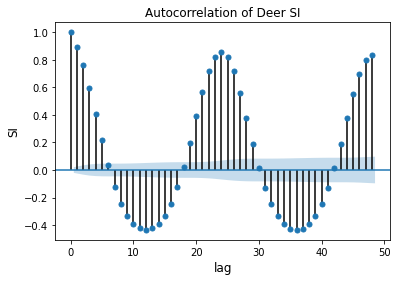

In [ ]:
for i in df_Deer.columns.values:
  if (str(i) == 'DATE' or str(i) == 'TIME'):
    continue
  plot_acf(df_Deer[str(i)], lags=48)
  plt.xlabel("lag", fontsize=12)
  plt.ylabel(str(i), fontsize=12)
  plt.title('Autocorrelation of Deer ' + str(i), fontsize=12)

Each column seems to have 24 hr period, WS WD WG all have low correlation

### Partial correlation

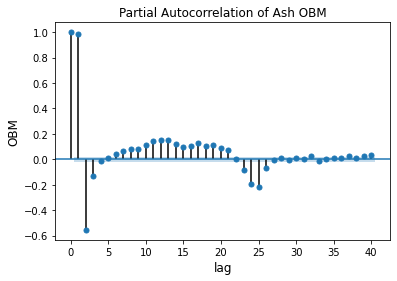

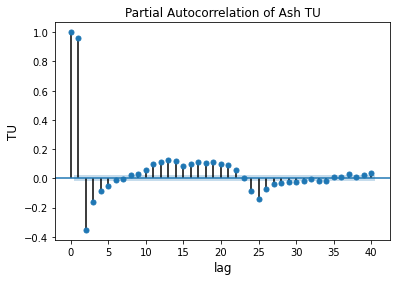

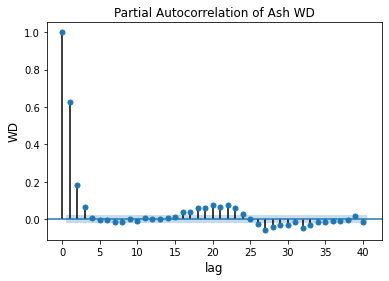

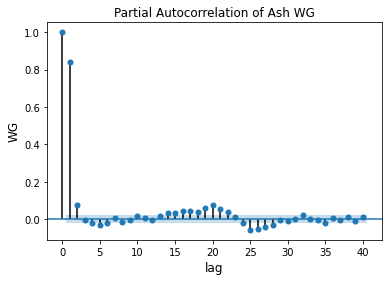

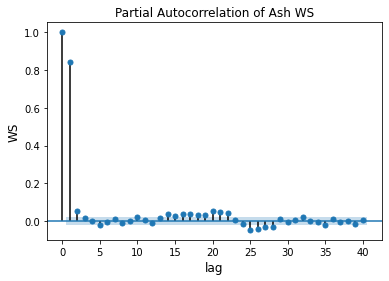

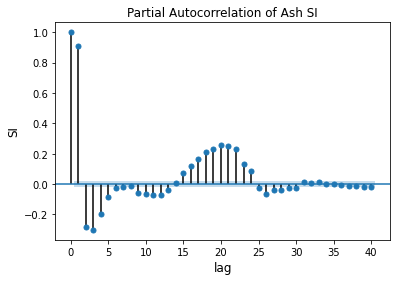

In [ ]:
for i in df_Ash.columns.values:
  if (str(i) == 'DATE' or str(i) == 'TIME'):
    continue
  plot_pacf(df_Ash[str(i)])
  plt.xlabel("lag", fontsize=12)
  plt.ylabel(str(i), fontsize=12)
  plt.title('Partial Autocorrelation of Ash ' + str(i), fontsize=12)

WS WD WG can predict well from previous 1 hr. The others can be predicted from previous 3 hr

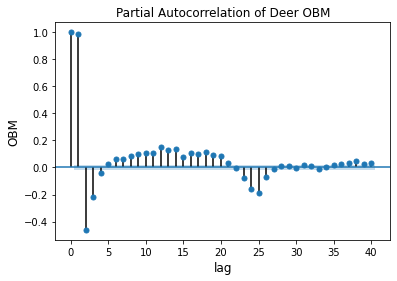

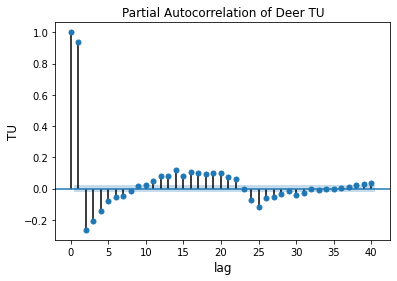

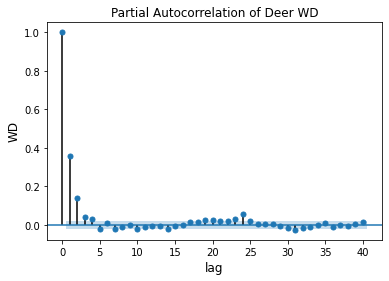

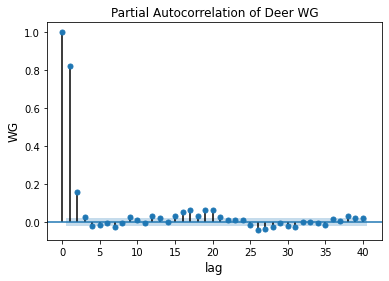

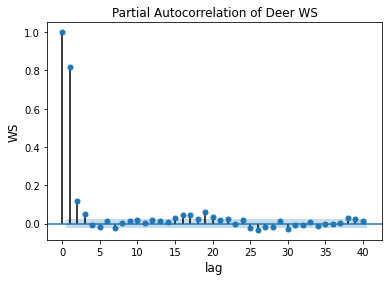

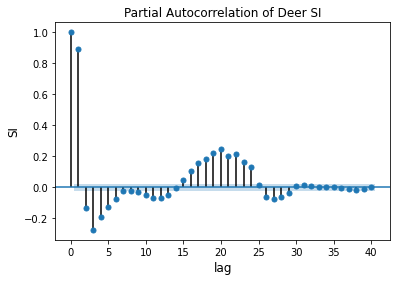

In [ ]:
for i in df_Deer.columns.values:
  if (str(i) == 'DATE' or str(i) == 'TIME'):
    continue
  plot_pacf(df_Deer[str(i)])
  plt.xlabel("lag", fontsize=12)
  plt.ylabel(str(i), fontsize=12)
  plt.title('Partial Autocorrelation of Deer ' + str(i), fontsize=12)

WS WD WG can predict well from previous 1 hr. The others can be predicted from previous 3 hr. These two lags have strong prediction effects.


### Cross correlation

In [ ]:
df_Ash.corr()

,OBM,TU,WD,WG,WS,SI
OBM,1.000000,-0.625697,0.236712,0.143211,0.021901,0.514695
TU,-0.625697,1.000000,-0.251106,-0.278897,-0.168175,-0.618418
WD,0.236712,-0.251106,1.000000,0.292327,0.230214,0.271607
WG,0.143211,-0.278897,0.292327,1.000000,0.967866,0.224224
WS,0.021901,-0.168175,0.230214,0.967866,1.000000,0.121193
SI,0.514695,-0.618418,0.271607,0.224224,0.121193,1.000000


In [ ]:
df_Deer.corr()

,OBM,TU,WD,WG,WS,SI
OBM,1.000000,-0.538917,-0.158286,0.155004,0.081674,0.465106
TU,-0.538917,1.000000,0.072723,-0.370380,-0.294817,-0.597987
WD,-0.158286,0.072723,1.000000,0.067288,0.081739,-0.242623
WG,0.155004,-0.370380,0.067288,1.000000,0.962864,0.161366
WS,0.081674,-0.294817,0.081739,0.962864,1.000000,0.090895
SI,0.465106,-0.597987,-0.242623,0.161366,0.090895,1.000000


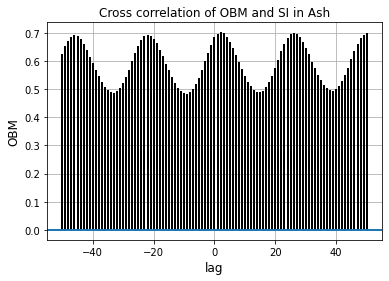

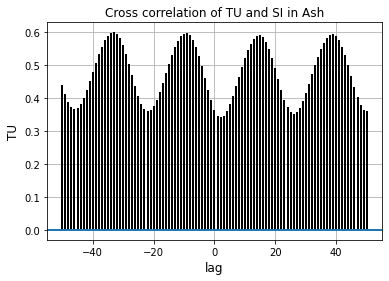

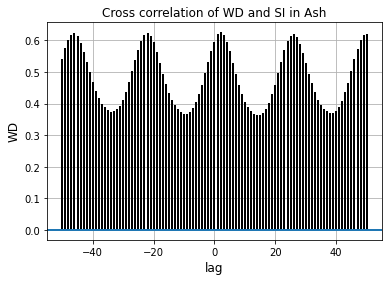

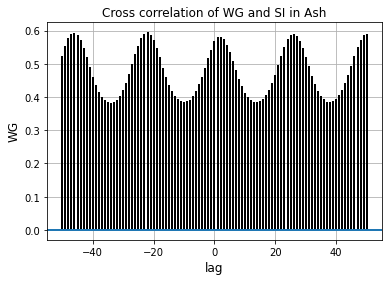

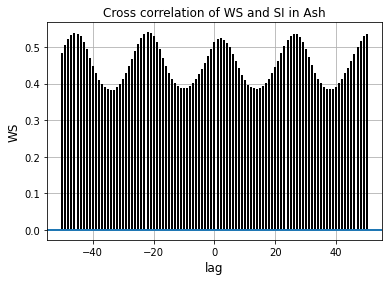

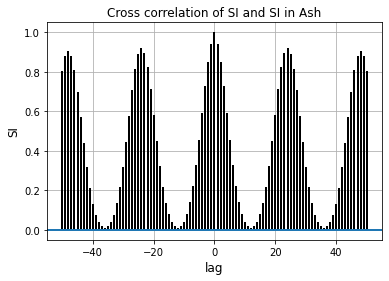

In [22]:
for i in df_Ash.columns.values:
  x = 'SI'
  if (str(i) == 'DATE' or str(i) == 'TIME' or str(i) == 'datetime'):
    continue
  plt.xcorr(df_Ash[str(i)].tolist(), df_Ash['SI'].tolist(), usevlines=True, maxlags=50, normed=True, lw=2)
  plt.xlabel("lag", fontsize=12)
  plt.ylabel(str(i), fontsize=12)
  plt.grid(True)
  plt.title('Cross correlation of ' + str(i) + ' and SI in Ash', fontsize=12)
  plt.show()

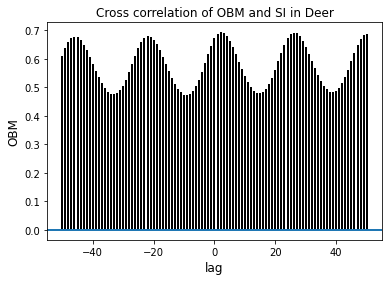

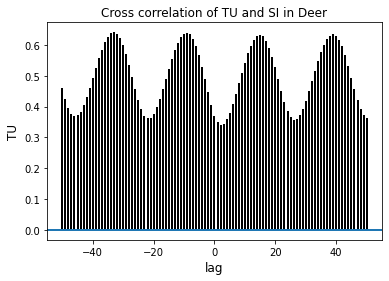

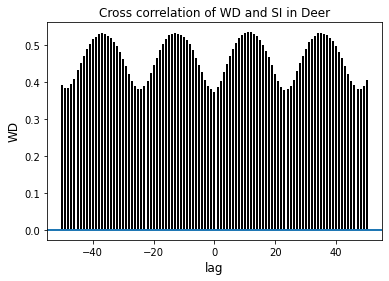

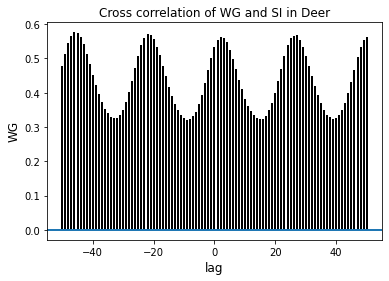

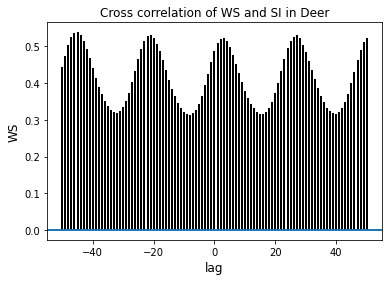

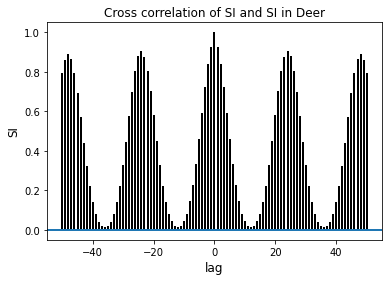

TypeError: ignored

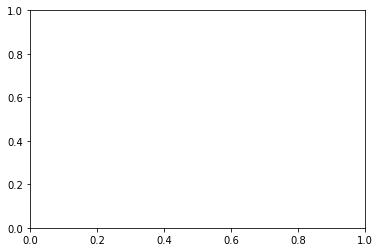

In [23]:
for i in df_Deer.columns.values:
  if (str(i) == 'DATE' or str(i) == 'TIME'):
    continue
  plt.xcorr(df_Deer[str(i)], df_Deer['SI'], usevlines=True, maxlags=50, normed=True, lw=2)
  plt.xlabel("lag", fontsize=12)
  plt.ylabel(str(i), fontsize=12)
  plt.title('Cross correlation of ' + str(i) + ' and SI in Deer', fontsize=12)
  plt.show()

Comparison of variables at two sites

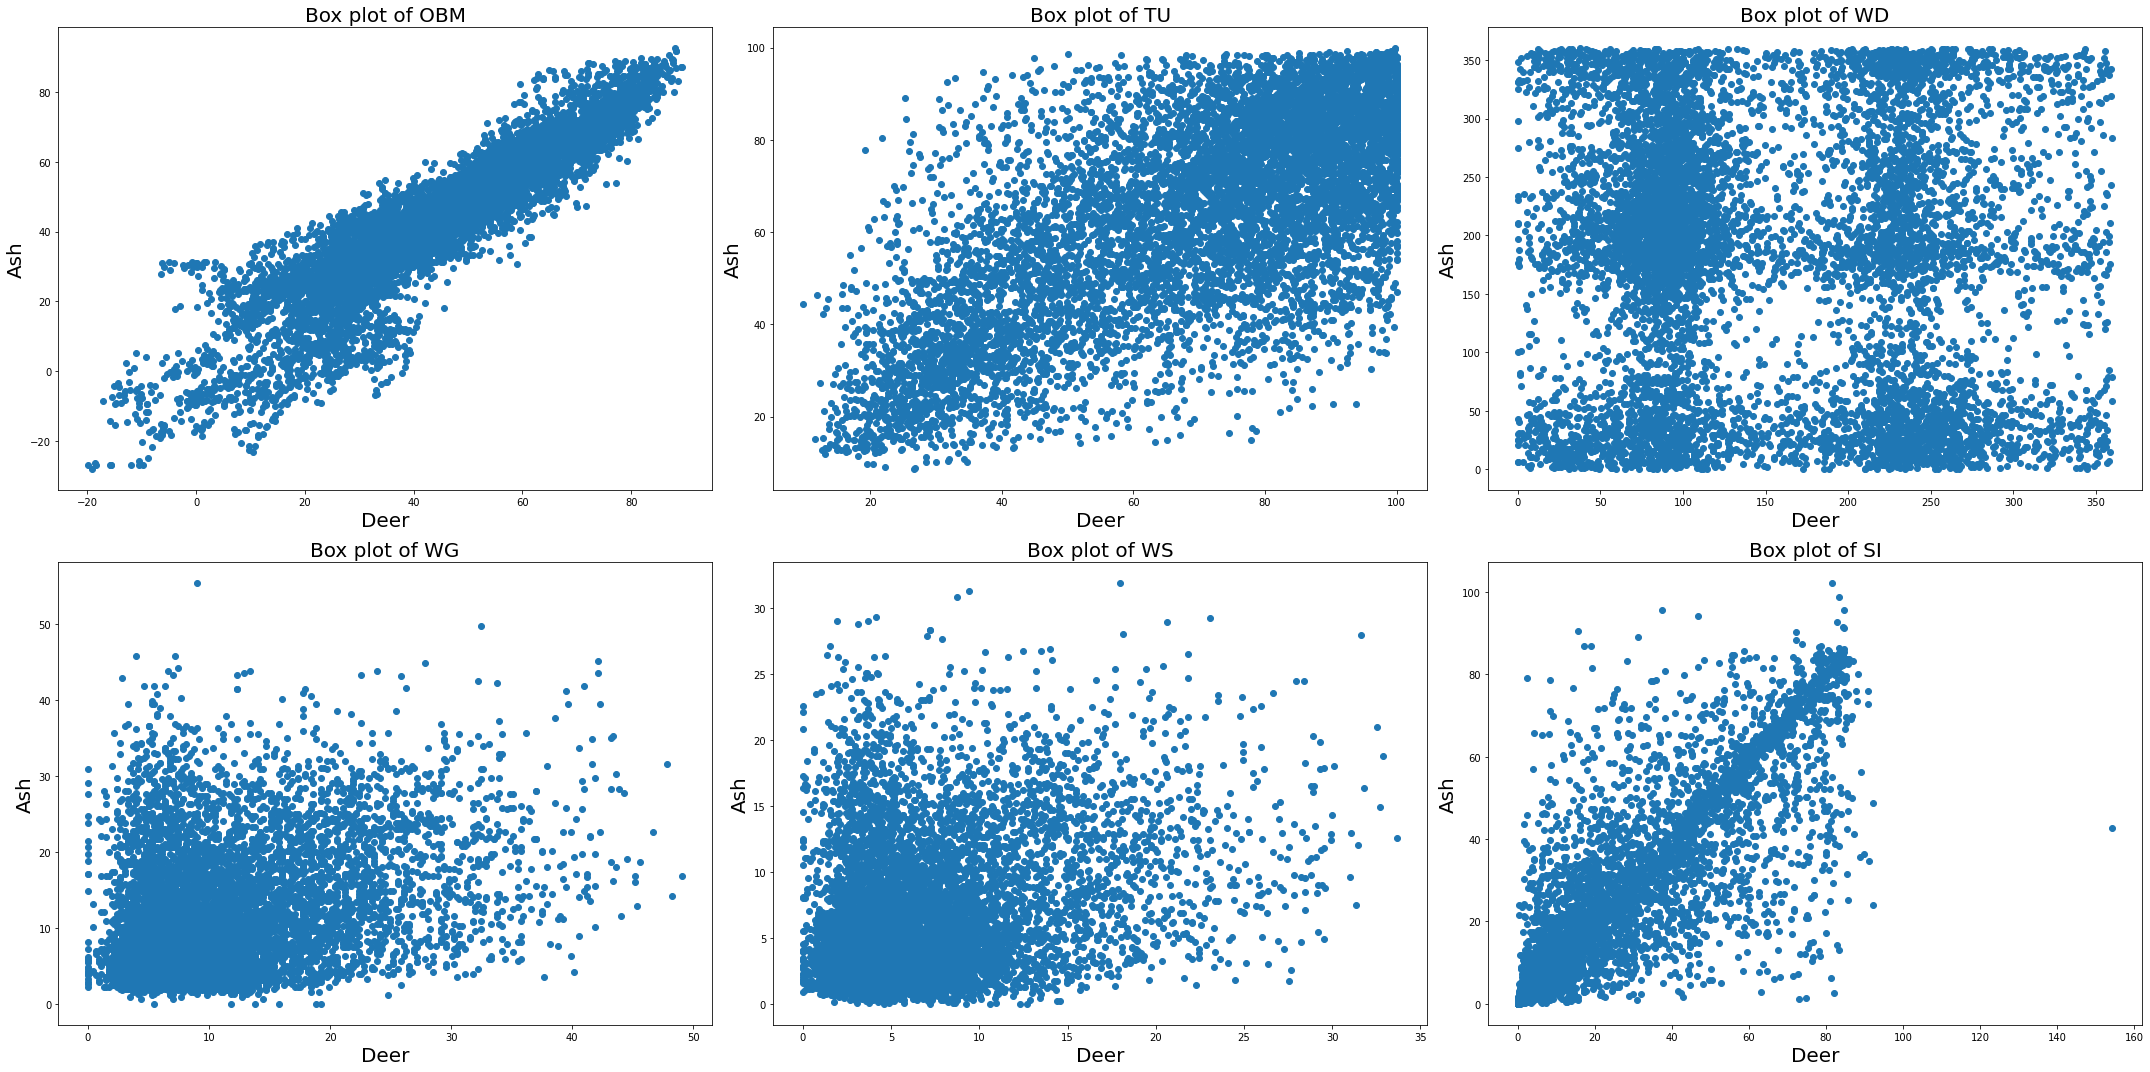

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15)) # (1, 2) inputs say we want 1 row and 2 columns of plots
col_values = df_Deer.columns.values.tolist()
data_list = [[df_Ash['OBM'].tolist(), df_Deer['OBM'].tolist()],[df_Ash['TU'].tolist(), df_Deer['TU'].tolist()], [df_Ash['WD'].tolist(), df_Deer['WD'].tolist()]
             , [df_Ash['WG'].tolist(), df_Deer['WG'].tolist()], [df_Ash['WS'].tolist(), df_Deer['WS'].tolist()], [df_Ash['SI'].tolist(), df_Deer['SI'].tolist()]]
j = 2
for i in range(6):
    x = i // 3
    y = i
    i = i % 3
    ax[x, i].scatter(data_list[y][0], data_list[y][1])
    ax[x, i].set_ylabel('Ash', fontsize=20)
    ax[x, i].set_xlabel('Deer', fontsize=20)
    ax[x, i].set_title('Box plot of ' + str(col_values[j]), size = 20)
    j += 1
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

OBM TU SI positive correlation